In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [10]:
img = cv2.imread('tree.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

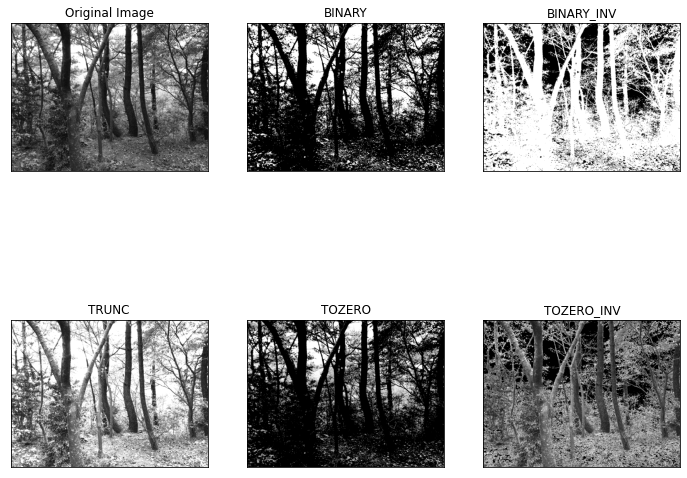

In [11]:
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

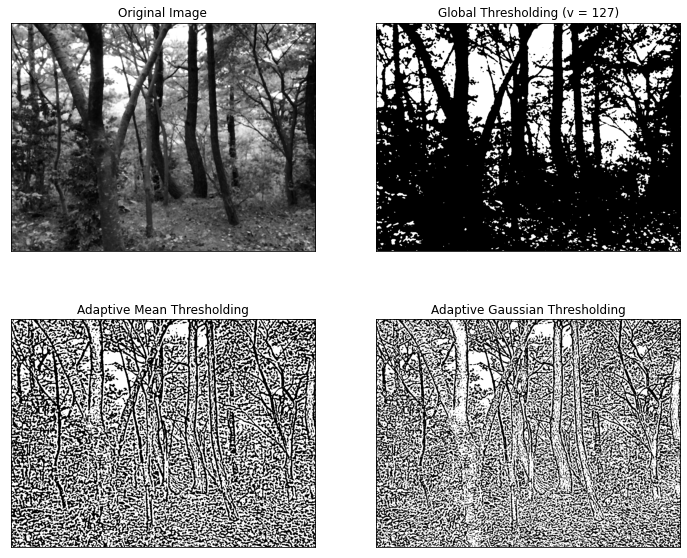

In [12]:

img = cv2.imread('tree.jpg ',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
plt.figure(figsize=(12, 10))
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


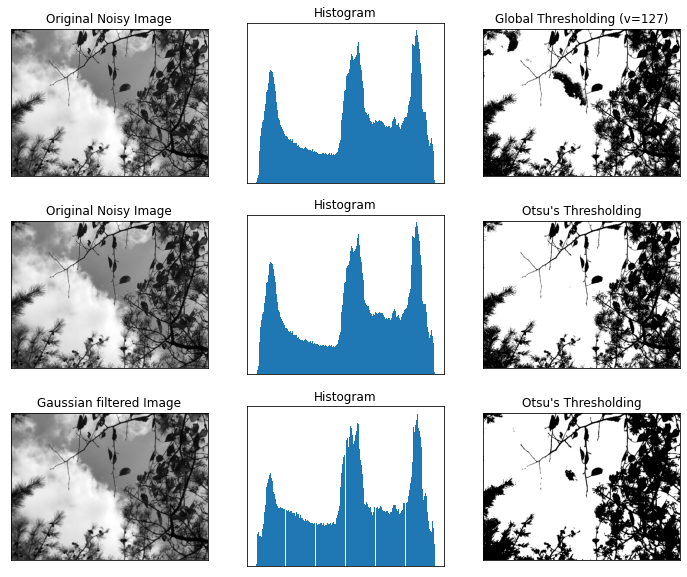

In [13]:
img = cv2.imread('sky.jpg',0)
cv2.imwrite('sky.jpg', img)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


In [14]:
img = cv2.imread('sky.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imwrite('bssky.jpg', img)
# find normalized_histogram, and its cumulative distribution function

True

In [15]:
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
    print(thresh,fn_min)




-1 inf
-1 inf
-1 inf
4 544872.5079607787
5 544634.0521459985
6 542840.494283563
7 539133.171069491
8 535192.2093883768
9 531760.7288814303
10 528400.9286696032
11 525080.4896718211
12 521900.33841171267
13 518531.7053378609
14 514515.87641868327
15 510050.38084895065
16 504876.060204999
17 499218.4819030257
18 492945.82804173883
19 485889.4213211322
20 477907.21038122533
21 469541.1874013967
22 460878.9754378814
23 452343.239412192
24 443326.5753533491
25 434201.93354274204
26 425051.30797387694
27 416508.2711561991
28 408237.34554612456
29 400689.1780029132
30 393582.9826066369
31 386785.32715296367
32 380472.3339305139
33 374205.18707887543
34 368452.359707321
35 362970.4196832508
36 357424.40880428744
37 352223.8660031405
38 347051.7166526976
39 342023.15867229487
40 336904.26447526953
41 331902.8490811502
42 326930.8776820541
43 322095.4704114276
44 317381.8282255121
45 312744.37863288383
46 308067.2471839962
47 303560.59375225473
48 298935.7075629326
49 294604.76384242665
50 29029

C:\Users\kge50\AppData\Local\Temp/ipykernel_11504/333720084.py:12: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\kge50\AppData\Local\Temp/ipykernel_11504/333720084.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\kge50\AppData\Local\Temp/ipykernel_11504/333720084.py:13: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2


In [16]:
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

121 120.0
